# Essais régression avec données simples générées

#__Réseau simple avec une seule couche cachée et une fonction d'activation *Relu*.__


In [61]:
# Génère les données
import numpy as np
import pandas as pd
from random import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import numpy.random as npr

from sklearn import neighbors, datasets

# import the iris data to play with, keep only two input variables in order to make the plots at the end of the script
iris = datasets.load_iris()
print(iris.data.shape)

x = iris.data[:,:3]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)


(150, 4)
(120, 3)
(120,)


In [62]:
# Onenote Encoding

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [63]:
# Build the model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error
from keras.utils.vis_utils import plot_model

inp = Input((3,))
h = Dense(10)(inp)
h1 = Activation ("relu")(h)
h1 = Dense(10)(h1)
h2 = Activation ("relu")(h1)
out = Dense(3)(h2)
model = Model(inputs=inp, outputs=out)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                40        
_________________________________________________________________
activation_32 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_33 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 3)                 33        
Total params: 183
Trainable params: 183
Non-trainable params: 0
____________________________________________________________

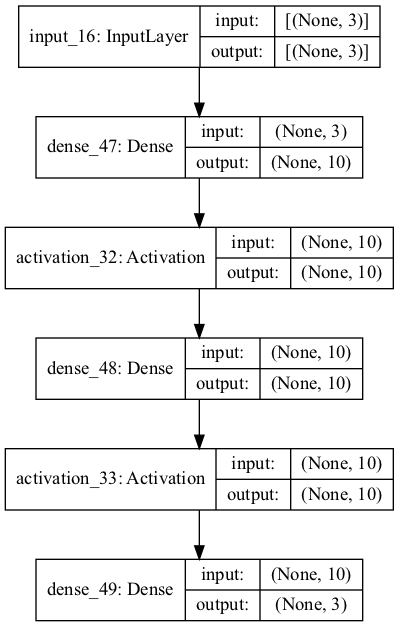

In [64]:
plot_model(model,show_shapes=True)

In [65]:
H = model.fit(X_train,y_train,epochs=100,batch_size=30,validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 0s 26ms/step - loss: 6.1818 - accuracy: 0.3572 - val_loss: 5.7307 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 5.5182 - accuracy: 0.3239 - val_loss: 5.6525 - val_accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 6.0281 - accuracy: 0.3583 - val_loss: 5.5922 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 5.7607 - accuracy: 0.3450 - val_loss: 5.5347 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 5.5495 - accuracy: 0.3361 - val_loss: 5.4730 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 5.7297 - accuracy: 0.3506 - val_loss: 5.4027 - val_accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 5.4178 - accuracy: 0.3350 - val_loss: 5.3746 - val_accuracy: 0.3333
Epoch 8/100
4/4 [=========

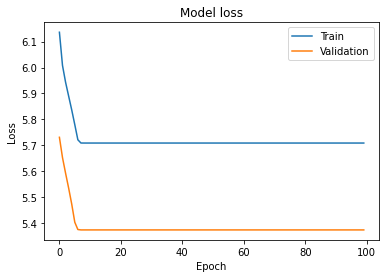

(120, 3)
(120, 3)
1/1 [==============================] - 0s 12ms/step - loss: 4.2987 - accuracy: 0.2667
Le loss sur le jeu de test est : [4.2986602783203125, 0.2666666805744171]
(120, 3)


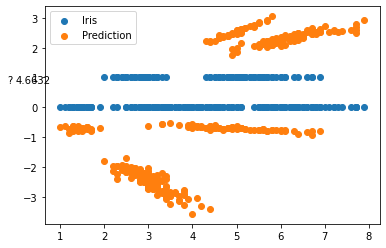

Text(0, 0.8, '4.5253')

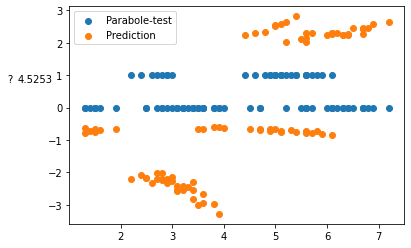

In [66]:
# Show results
import matplotlib.pyplot as plt

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

print(X_train.shape)
print(y_train.shape)

test_loss = model.evaluate(X_test,y_test)
print('Le loss sur le jeu de test est :' ,test_loss)

# observed vs predicted for training
pred_train=model.predict(X_train)
print(pred_train.shape)
plt.scatter(X_train,y_train)
plt.scatter(X_train,pred_train)
plt.legend(['Iris', 'Prediction'])
plt.text(-0.2,0.8,'?')
plt.text(0,0.8,np.round(np.mean((pred_train-y_train)**2),4))
plt.show()

# observed vs predicted for test
pred=model.predict(X_test)
plt.scatter(X_test,y_test)
plt.scatter(X_test,pred)
plt.legend(['Parabole-test', 'Prediction'])
plt.text(-0.2,0.8,'?')
plt.text(0,0.8,np.round(np.mean((pred-y_test)**2),4))

# Réseau avec plusieurs couches cachées

In [67]:
inp = Input((3,))
h = Dense(6)(inp)
h1 = Activation ("relu")(h)
h2 = Dense(10) (h1)
h3 = Activation ("sigmoid")(h2)
h4 = Dense(10) (h3)
h5 = Activation ("relu")(h4)
out = Dense(3)(h5)

model = Model(inputs=inp, outputs=out)
model.compile(Adam(),mean_squared_error)

H = model.fit(X_train,y_train,epochs=150,batch_size=30,validation_split=0.2)


Epoch 1/150
4/4 [==============================] - 0s 23ms/step - loss: 1.3536 - val_loss: 1.1962
Epoch 2/150
4/4 [==============================] - 0s 7ms/step - loss: 1.1664 - val_loss: 1.0583
Epoch 3/150
4/4 [==============================] - 0s 7ms/step - loss: 1.0273 - val_loss: 0.9361
Epoch 4/150
4/4 [==============================] - 0s 7ms/step - loss: 0.9621 - val_loss: 0.8292
Epoch 5/150
4/4 [==============================] - 0s 7ms/step - loss: 0.8331 - val_loss: 0.7384
Epoch 6/150
4/4 [==============================] - 0s 6ms/step - loss: 0.7579 - val_loss: 0.6616
Epoch 7/150
4/4 [==============================] - 0s 7ms/step - loss: 0.6976 - val_loss: 0.5965
Epoch 8/150
4/4 [==============================] - 0s 7ms/step - loss: 0.6157 - val_loss: 0.5404
Epoch 9/150
4/4 [==============================] - 0s 7ms/step - loss: 0.5715 - val_loss: 0.4938
Epoch 10/150
4/4 [==============================] - 0s 7ms/step - loss: 0.4976 - val_loss: 0.4583
Epoch 11/150
4/4 [==========

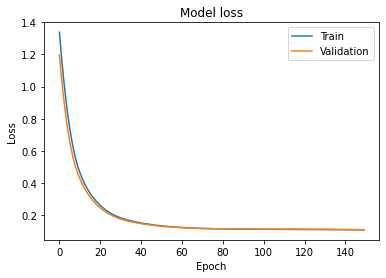

(120, 3)
(120, 3)
1/1 [==============================] - 0s 9ms/step - loss: 0.1176
Le loss sur le jeu de test est : 0.11758937686681747


Text(0, 0.8, '0.1176')

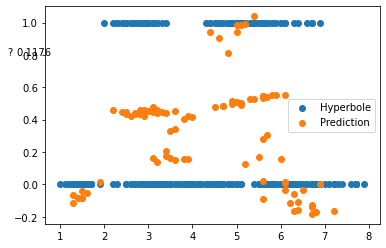

In [68]:
# Show results
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

print(X_train.shape)
print(y_train.shape)

test_loss = model.evaluate(X_test,y_test)
print('Le loss sur le jeu de test est :' ,test_loss)

pred=model.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_test,pred)
plt.legend(['Hyperbole', 'Prediction'])
plt.text(-0.2,0.8,'?')
plt.text(0,0.8,np.round(np.mean((pred-y_test)**2),4))

#__TODO__
* Augmenter la taille de l'échantillon
* Ajouter du bruit à la fonction y=x^2 avec par exmple npr.normal
* Que donne la prévision pour des valeurs tests en dehors ed l'intervalle [-1,1]

